In [110]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


In [111]:
path = os.getcwd()
train = pd.read_csv(path+"/digits_train.csv")
test = pd.read_csv(path+"/digits_test.csv")

row: 8| digit: 1
row: 53| digit: 1
row: 151| digit: 7
row: 622| digit: 7


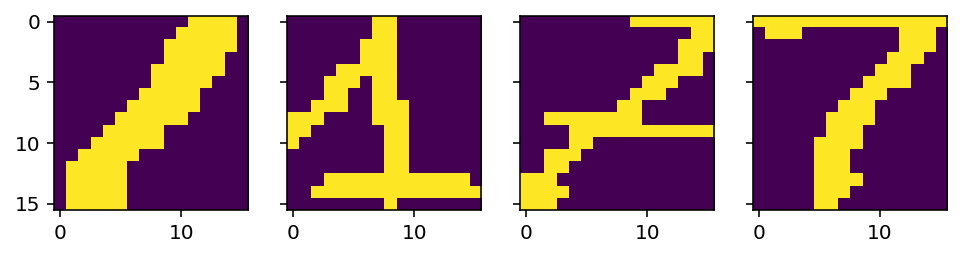

In [112]:
def plotDigit(k,dat):
    f = np.reshape(np.array(dat.loc[k][0:256]),[-1,16])
    print("row: "+str(k)+"| digit: "+str(dat.loc[k][256]))
    return f 
fig ,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey = True ,figsize = (8,2))
ax1.imshow(plotDigit(8,train))  
ax2.imshow(plotDigit(53,train))
ax3.imshow(plotDigit(151,train))
ax4.imshow(plotDigit(622,train))



76
56
91
99
96
78
80
98
139
85


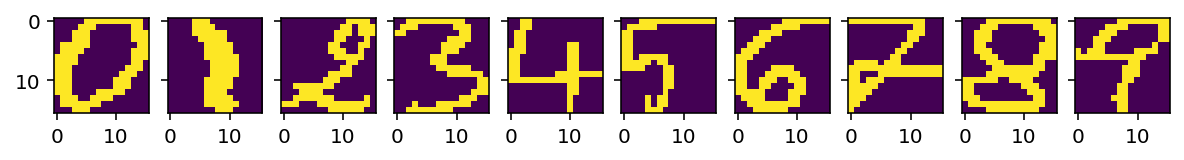

In [113]:
numbers = np.unique(train["digit"])
fig ,axs = plt.subplots(1,10,sharey = True ,figsize = (10,3))
for j in numbers:
    q = 8
    dataj = train[train['digit'] == j].iloc[q,:]
    print(train[train['digit'] == j].index[q])
    fj = np.reshape(dataj[:256].values.flatten(),[-1,16])
    axs[j].imshow(fj)



# .

## .

The number is:  1
The number is:  7
The number is:  2
The number is:  4
The number is:  6
The number is:  9


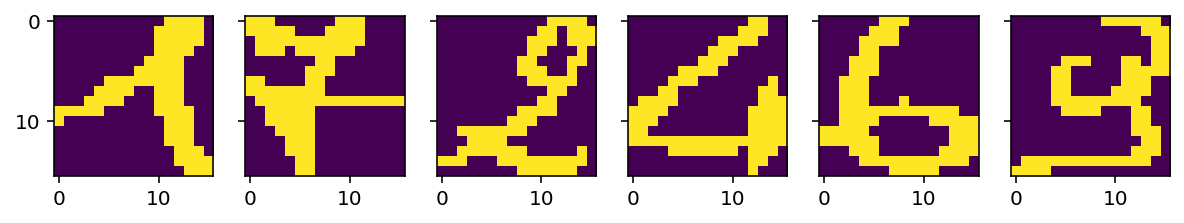

In [114]:
fuzzys = [[1,47],[7,49],[2,91],[4,102],[6,89],[9,178]]
fig ,axs = plt.subplots(1,6,sharey = True ,figsize = (10,3))
j=0
for t in fuzzys:

    q = t[1]
    dataj = train.iloc[q,:]
    fj = np.reshape(dataj[:256].values.flatten(),[-1,16])
    axs[j].imshow(fj)
    j+=1
    print("The number is: ",str(t[0]))

## .

In [115]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 


In [116]:
# classificaton 1 and 7
X = train[(train['digit'] == 1) | (train["digit"] == 7)]
y= X.digit.map(lambda x: 1 if x ==1  else 0)
X = X.drop(["digit"],axis=1)

In [117]:
clf = LR()
clf.fit(X,y)
clf.score(X,y)

1.0

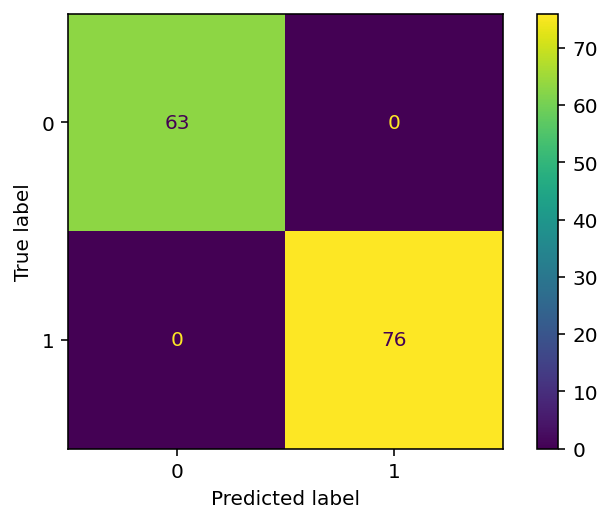

In [118]:
train_matrix = confusion_matrix(y, clf.predict(X),labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=train_matrix,
                               display_labels=clf.classes_)
disp.plot()

In [119]:
testX=  test[(test['digit'] == 1) | (test["digit"] == 7)]
testy= testX.digit.map(lambda x: 1 if x ==1  else 0)
testX = testX.drop(["digit"],axis=1)

In [120]:
clf.score(testX,testy)

0.9642857142857143

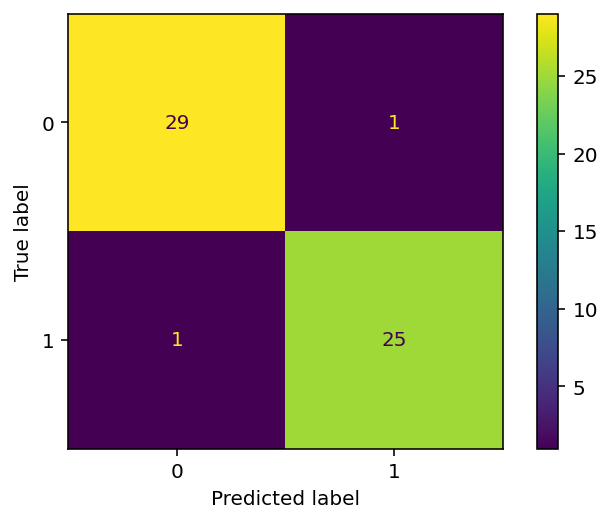

In [121]:
test_matrix = confusion_matrix(testy,clf.predict(testX),labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=test_matrix,
                               display_labels=clf.classes_)
disp.plot()

### In the training set, all the numbers are correctly classified. In the test set, only 2 predictions are wrong. A picture that is actually 1 is predicted to be 7, and a 7 is predicted to be 1

In [122]:
result = (clf.predict(testX) == testy)
wrong = result[result==0].index.values



The figure is:  7 and the prediction is false.
The figure is:  1 and the prediction is false.


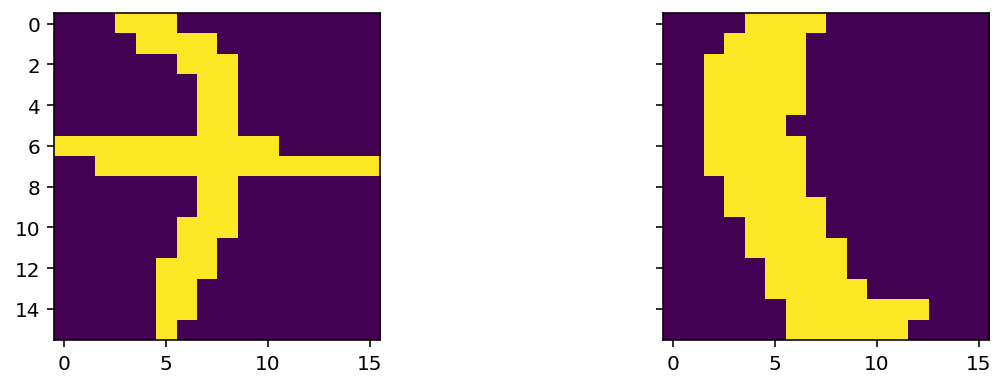

In [123]:
fig ,axs = plt.subplots(1,2,sharey = True ,figsize = (10,3))
j=0
for t in wrong:
    dataj = test.iloc[t,:]
    fj = np.reshape(dataj[:256].values.flatten(),[-1,16])
    axs[j].imshow(fj)
    print("The figure is: ",test.iloc[t,-1],"and the prediction is false.")
    j+=1

# .

## .

In [124]:
multi_clf = LR(multi_class = 'ovr',max_iter=1000)

**In the LogisticRegression function in sklearn, the optional parameters "ovr" and "multinomial" for multi-class problems. For the "ovr" type and the class mentioned in the class, select a base class to compare with other classes, and "multinomial" is to take any pair .For comparison, the number of operations is more and the correct rate is higher**

In [125]:
trainX = train.iloc[:,:-1]
trainY = train.iloc[:,-1]
testX = test.iloc[:,:-1]
testY = test.iloc[:,-1]

In [126]:
multi_clf.fit(trainX,trainY)

LogisticRegression(max_iter=1000, multi_class='ovr')

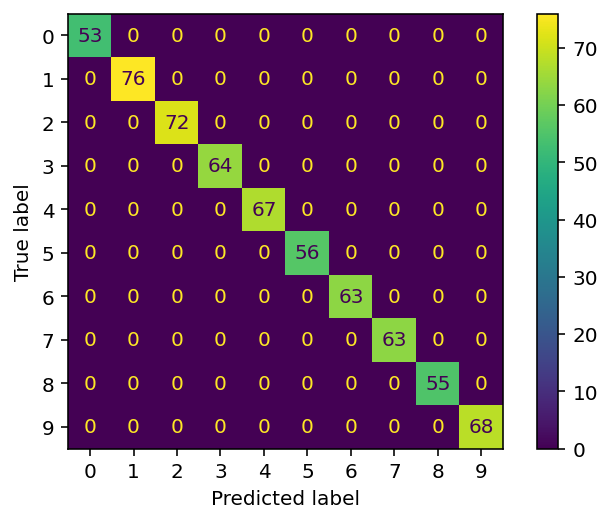

In [127]:
train_matrix = confusion_matrix(trainY, multi_clf.predict(trainX),labels = multi_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=train_matrix,
                               display_labels=multi_clf.classes_)
disp.plot()

**Observing the confusion matrix of the training set, we can find that the model can correctly classify all images on the training set, and there is a phenomenon of perfect seperation.**

## .

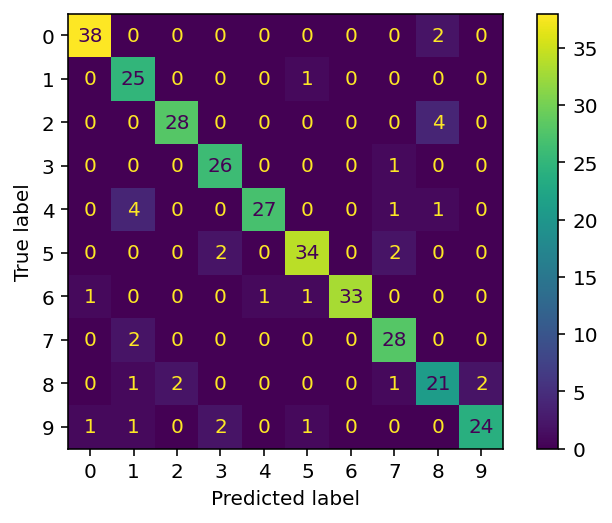

In [128]:
test_matrix = confusion_matrix(testY, multi_clf.predict(testX),labels = multi_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=test_matrix,
                               display_labels=multi_clf.classes_)
disp.plot()

**Observing the confusion matrix of the test set, we can find that the classifier is relatively inaccurate in predicting 2, 4, 8, and 9, while it is more accurate in predicting 1-7, which is contrary to guessing.**

## .

In [129]:
print("The accuracy on the test set is :{:.4f}".format(multi_clf.score(testX,testY)))

The accuracy on the test set is :0.8931


In [130]:
result = (multi_clf.predict(testX) == testY)
wrong = result[result==0].index.values

The figure is:  4 and the prediction is false.
The figure is:  4 and the prediction is false.
The figure is:  9 and the prediction is false.
The figure is:  0 and the prediction is false.


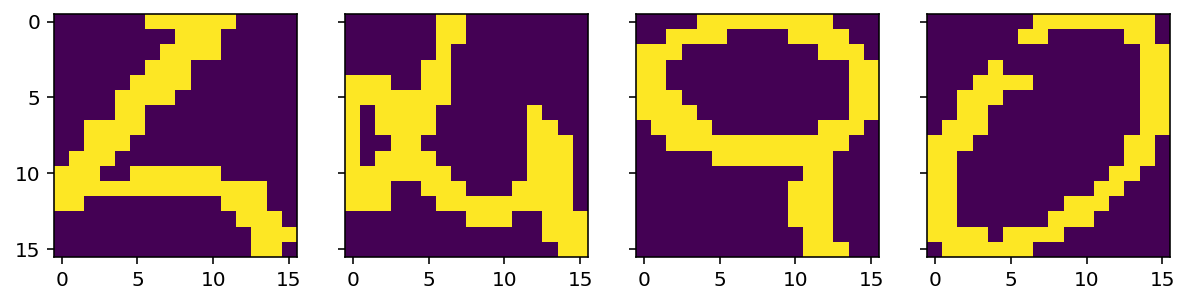

In [131]:
fig ,axs = plt.subplots(1,4,sharey = True ,figsize = (10,3))
j=0
for i in range(4):
    t = wrong[i]+1
    dataj = test.iloc[t,:]
    fj = np.reshape(dataj[:256].values.flatten(),[-1,16])
    axs[j].imshow(fj)
    print("The figure is: ",test.iloc[t,-1],"and the prediction is false.")
    j+=1

# .

## .

In [132]:
from sklearn.model_selection import GridSearchCV


In [133]:

parameters = {'penalty':['l2'], 'solver':['lbfgs'],'multi_class':['multinomial'],'C':[10**x for x in range(-3,12)]}
svc = LR()
clf = GridSearchCV(svc, parameters,cv=10,scoring='accuracy')
clf.fit(trainX,trainY)
%time 


CPU times: user 7 µs, sys: 23 µs, total: 30 µs
Wall time: 7.87 µs


In [134]:
df_results = pd.DataFrame({'c':clf.cv_results_["param_C"].data,'accuracy':clf.cv_results_["mean_test_score"].data})

In [135]:
df_results = df_results.dropna(how = "any")

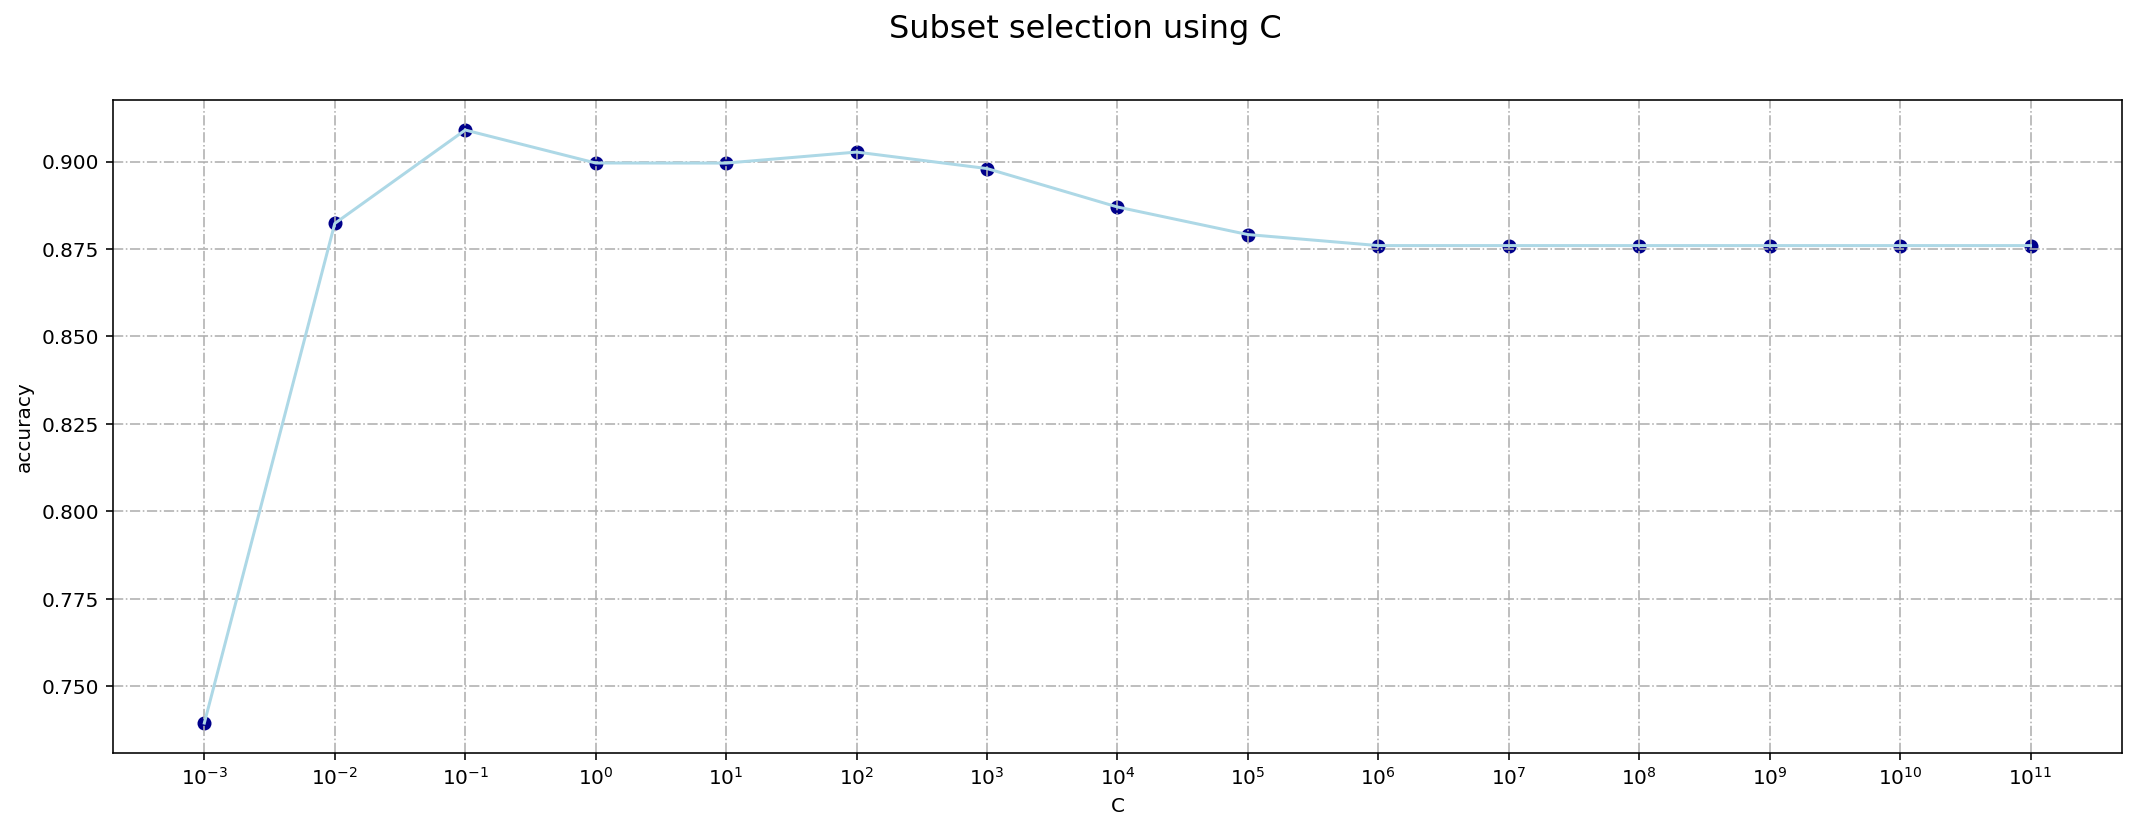

The best C_(min) is 0.1


In [136]:
fig = plt.figure(figsize = (18,6))
v = 'accuracy'
ax = fig.subplots(1, 1)

ax.grid(True, linestyle='-.')
ax.set_xscale('log')
ax.set_xticks([10**x for x in range(-3,12)])
ax.plot(df_results['c'],df_results[v], color = 'lightblue')
ax.scatter(df_results['c'],df_results[v], color = 'darkblue')
ax.set_xlabel('C')
ax.set_ylabel(v)
fig.suptitle('Subset selection using ' + "C", fontsize = 16)
plt.show()
print("The best C_(min) is 0.1")


In [137]:
clf.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [164]:
best_clf = LR(penalty='l2',C=0.1,multi_class='multinomial',max_iter=1000,solver='lbfgs')
best_clf.fit(trainX,trainY)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

## 3-2

In [165]:
print('The accuracy on train set : {:.4f}'.format(best_clf.score(trainX,trainY)))

The accuracy on train set : 0.9890


In [166]:
print('The accuracy on test set : {:.4f}'.format(best_clf.score(testX,testY)))

The accuracy on test set : 0.8868


## 3-3

In [171]:
print("The number of coefficients that are estimated as zero :",(abs(best_clf.coef_) < 1e-2).sum())
# print("The number of coefficients that are not estimated as zero :",(best_clf.coef_ > 1e-5).sum())

The number of coefficients that are estimated as zero : 203


**It can be found that the number of coefficients estimated to be 0 is similar to the number of non-zeros, so it is in line with the expectation. Lasso regression is regularized. The gradient obtained during gradient descent only has two values ​​of 1 and -1, so the step size is updated each time It is moving forward steadily; the regularization gradient of Ridge regression will decrease as it approaches the lowest point, and when it approaches the minimum, its gradient will also become smaller, so it will not really become 0, so Ridge’s better effect.**

# .

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(trainX)
pca_X = pca.transform(trainX)

In [143]:
import warnings
warnings.filterwarnings('ignore')
parameters = {'penalty':['l2'], 'solver':['lbfgs'],'multi_class':['multinomial'],'C':[10**x for x in range(-3,12)]}
logr = LR()
clf = GridSearchCV(logr, parameters,cv=10,scoring='accuracy')
clf.fit(pca_X,trainY)
%time 

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


In [144]:
df_results = pd.DataFrame({'c':clf.cv_results_["param_C"].data,'accuracy':clf.cv_results_["mean_test_score"].data})

In [145]:
df_results = df_results.dropna(how = "any")

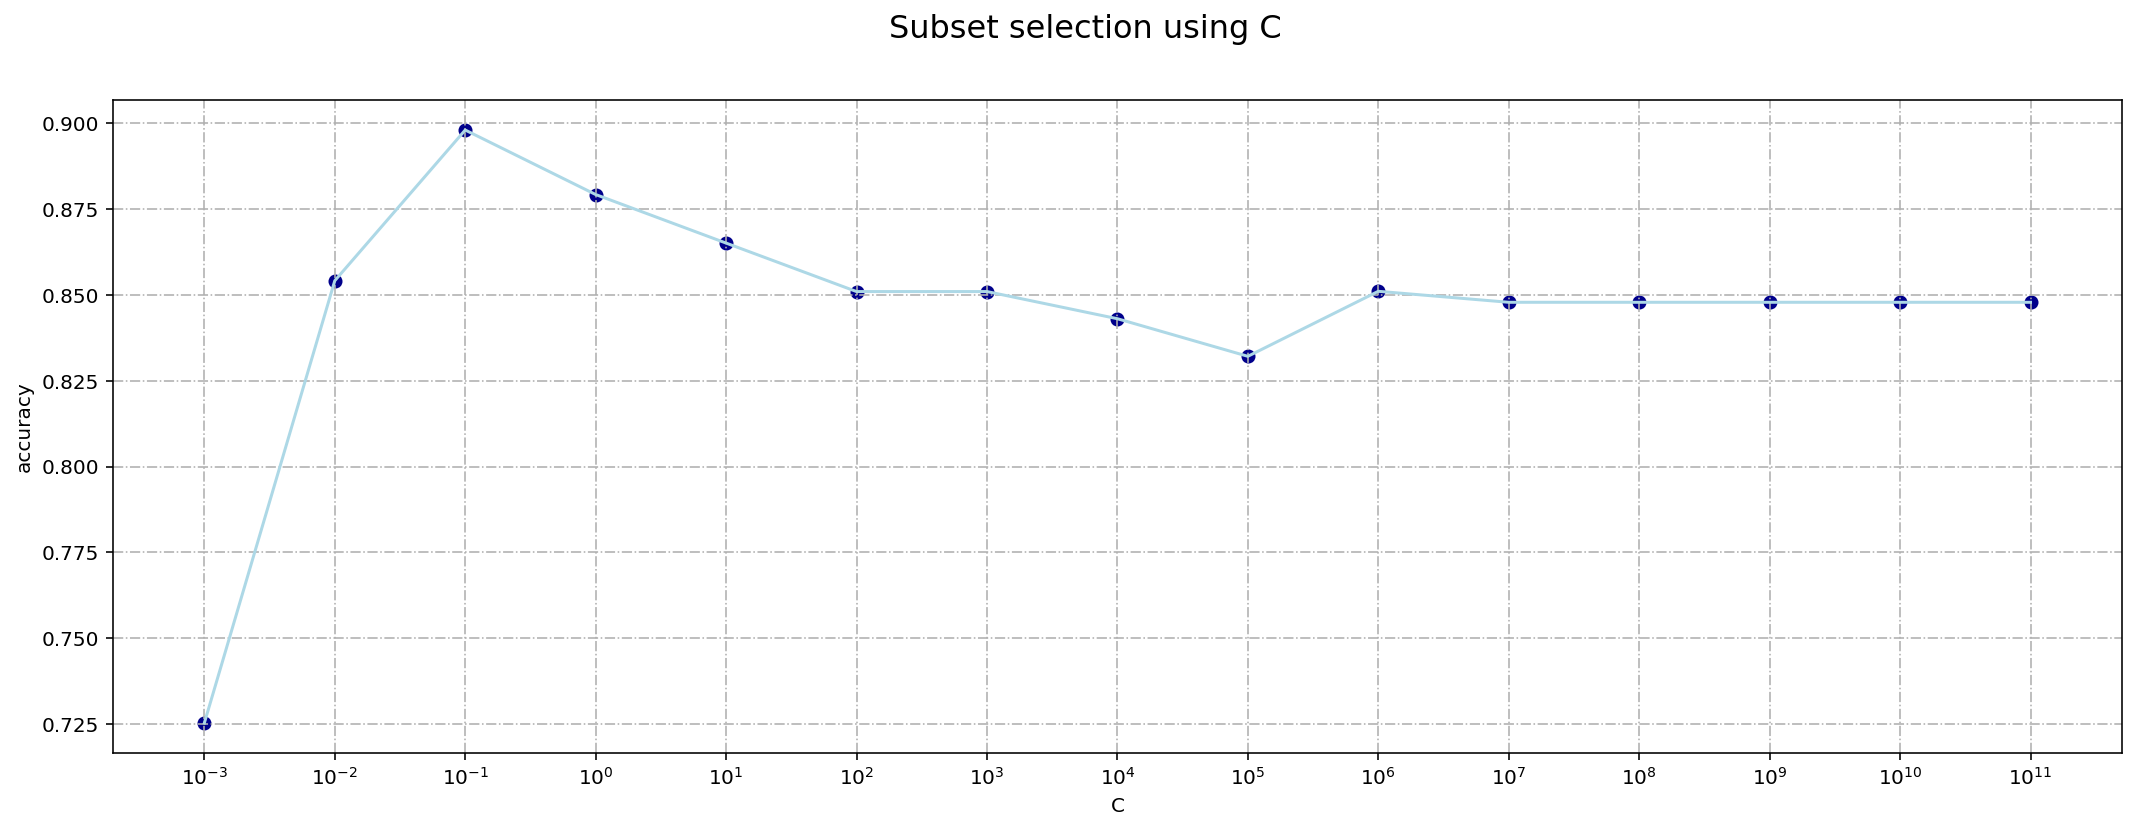

The best C_(min) is 0.1


In [146]:
fig = plt.figure(figsize = (18,6))
v = 'accuracy'
ax = fig.subplots(1, 1)

ax.grid(True, linestyle='-.')
ax.set_xscale('log')
ax.set_xticks([10**x for x in range(-3,12)])
ax.plot(df_results['c'],df_results[v], color = 'lightblue')
ax.scatter(df_results['c'],df_results[v], color = 'darkblue')
ax.set_xlabel('C')
ax.set_ylabel(v)
fig.suptitle('Subset selection using ' + "C", fontsize = 16)
plt.show()
print("The best C_(min) is 0.1")


In [147]:
clf.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [148]:
best_clf = LR(penalty='l2',C=0.1,multi_class='multinomial',max_iter=1000,solver='lbfgs')
best_clf.fit(pca_X,trainY)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [149]:
print('The accuracy on train set : {:.4f}'.format(best_clf.score(pca_X,trainY)))

The accuracy on train set : 0.9435


In [150]:
pca_test_X = pca.transform(testX)

In [151]:
print('The accuracy on test set : {:.4f}'.format(best_clf.score(pca_test_X,testY)))

The accuracy on test set : 0.8616


**The accuracy of the X-trained model processed by pca has decreased on both the training set and the test set, but it has dropped more on the training set.**

## .

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(trainX)
pca_X = pca.transform(trainX)

In [153]:
import warnings
warnings.filterwarnings('ignore')
parameters = {'penalty':['l2'], 'solver':['lbfgs'],'multi_class':['multinomial'],'C':[10**x for x in range(-3,12)]}
logr = LR()
clf = GridSearchCV(logr, parameters,cv=10,scoring='accuracy')
clf.fit(pca_X,trainY)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000, 10000000, 100000000, 1000000000,
                               10000000000, 100000000000],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [154]:
df_results = pd.DataFrame({'c':clf.cv_results_["param_C"].data,'accuracy':clf.cv_results_["mean_test_score"].data})

In [155]:
df_results = df_results.dropna(how = "any")

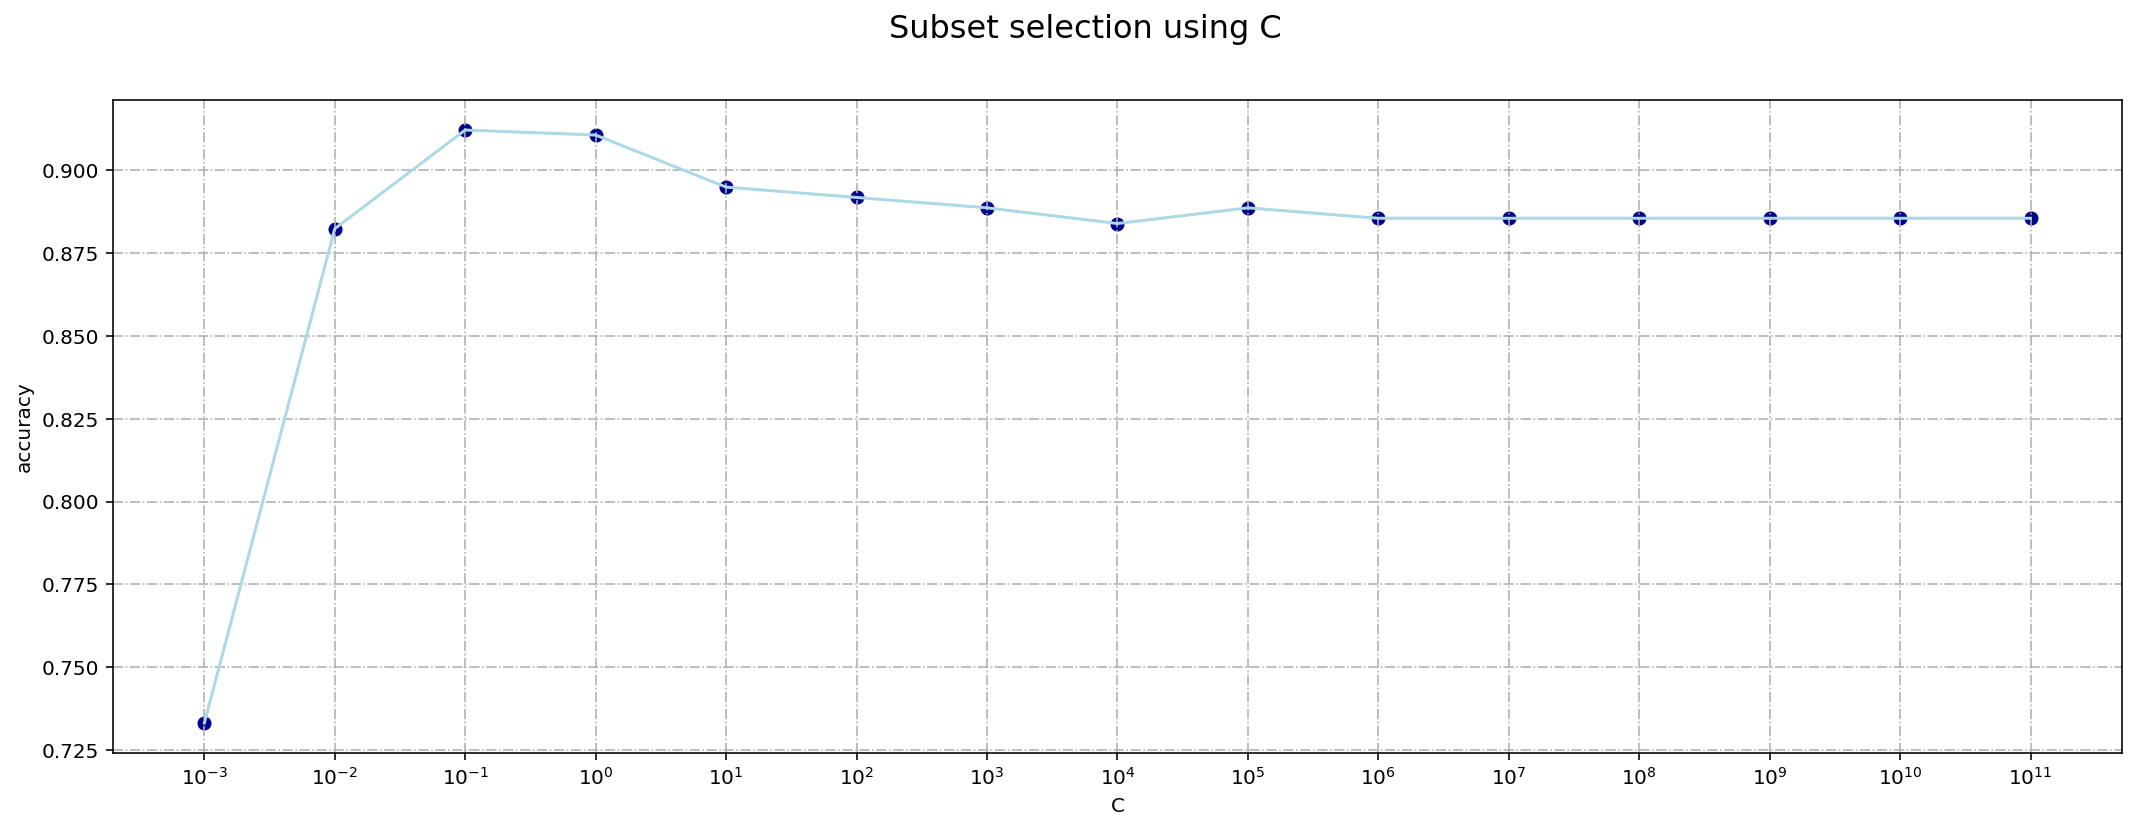

The best C_(min) is 0.1


In [156]:
fig = plt.figure(figsize = (18,6))
v = 'accuracy'
ax = fig.subplots(1, 1)

ax.grid(True, linestyle='-.')
ax.set_xscale('log')
ax.set_xticks([10**x for x in range(-3,12)])
ax.plot(df_results['c'],df_results[v], color = 'lightblue')
ax.scatter(df_results['c'],df_results[v], color = 'darkblue')
ax.set_xlabel('C')
ax.set_ylabel(v)
fig.suptitle('Subset selection using ' + "C", fontsize = 16)
plt.show()
print("The best C_(min) is 0.1")


In [157]:
clf.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [158]:
best_clf = LR(penalty='l2',C=0.1,multi_class='multinomial',max_iter=1000,solver='lbfgs')
best_clf.fit(pca_X,trainY)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [159]:
print('The accuracy on train set : {:.4f}'.format(best_clf.score(pca_X,trainY)))

The accuracy on train set : 0.9717


In [160]:
pca_test_X = pca.transform(testX)

In [161]:
print('The accuracy on test set : {:.4f}'.format(best_clf.score(pca_test_X,testY)))

The accuracy on test set : 0.8994


**After using 50 principal components, the accuracy on the training set is reduced, but it is higher than the accuracy on the test set, and the model is better than the original.**